In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data/laptops.csv')
df.head(5)

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [5]:
brand_nation = {
    'Dell': 'U.S.',
    'Apple': 'U.S.',
    'Acer': 'Taiwan',
    'HP': 'U.S.',
    'Lenovo': 'China',
    'Alienware': 'U.S.',
    'Microsoft': 'U.S.',
    'Asus': 'Taiwan'
}

In [6]:
# brand에 들어있는 값을 brand_nation의 값으로 바꾼다
df['brand'].map(brand_nation)

0        U.S.
1        U.S.
2        U.S.
3        U.S.
4        U.S.
        ...  
162    Taiwan
163    Taiwan
164    Taiwan
165    Taiwan
166    Taiwan
Name: brand, Length: 167, dtype: object

In [7]:
df['brand nation'] = df['brand'].map(brand_nation)

In [8]:
df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S.
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.


## groupby

In [11]:
nation_groups = df.groupby('brand nation')
type(nation_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [14]:
nation_groups.count()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand nation,,,,,,,,,,,,,,,
China,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
Taiwan,44,44,44,44,44,44,44,44,44,44,43,14,44,42,9
U.S.,105,105,105,105,105,105,105,105,105,104,102,50,105,100,28


In [15]:
# 최댓값을 보여주나 현 버전(1.2.4)에선 오류
# nation_groups.max()

ValueError: Wrong number of items passed 6, placement implies 8

In [17]:
nation_groups.mean()

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
brand nation,,,,,,,
China,6.000000,1080.888889,15.300000,47347.777778,2.500000,2.352941,2.461111
Taiwan,6.272727,726.363636,14.970455,53320.409091,2.164545,288.285714,2.242381
U.S.,7.314286,733.257143,14.603429,71541.295238,2.356346,2.980000,2.216500


In [18]:
# 가장 처음에 나오는 항목
nation_groups.first()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand nation,,,,,,,,,,,,,,,
China,Lenovo,300–15IBR,8,hdd,1024,15.6,40990,intel,i5,2.3,amd,2.0,linux,3.2,2.7 customer rating
Taiwan,Acer,Predator Helios 300,16,ssd,1024,15.6,101839,intel,i7,2.8,nvidia,6.0,windows,2.7,Gaming Laptop
U.S.,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,2.0,linux,2.5,Integrated Graphics


In [19]:
nation_groups.last()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand nation,,,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,1024,15.6,69990,intel,i7,3.5,nvidia,4.0,windows,2.2,"Core i7-7500U 7th Gen processor, Dolby Audio"
Taiwan,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,1.0,windows,2.3,Integrated Graphics
U.S.,Microsoft,Surface Book CR9-00013,8,ssd,128,13.5,178799,intel,i5,1.8,intel,2.0,windows,1.5,Integrated Graphics


brand nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

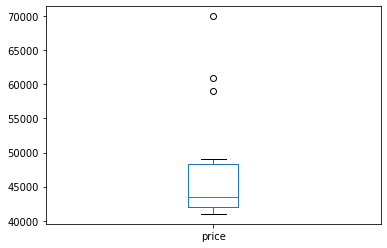

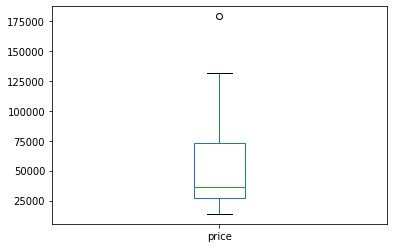

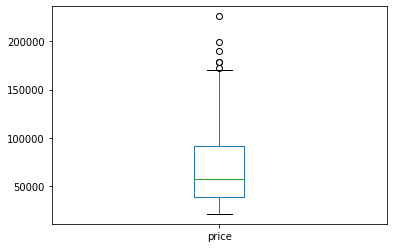

In [20]:
nation_groups.plot(kind = 'box', y ='price')

brand nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

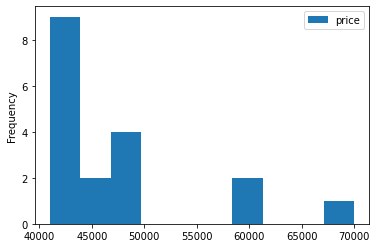

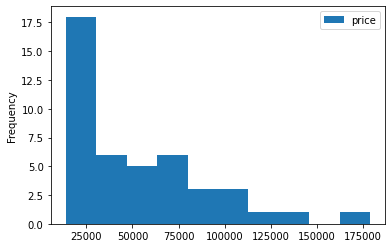

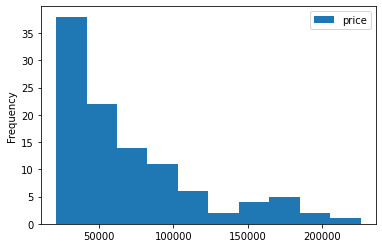

In [21]:
nation_groups.plot(kind = 'hist', y ='price')